In [4]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import importlib #for reloading
import Tekno as tk
import Types as tp
import numpy as np
import pandas as pd
import copy

In [6]:
#reload if needed
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of the grid shell

grid shells with various span (L) and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analysis

In [7]:
LperH = 8
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam

In [8]:
MatNL = True
n=7 # mm CHS cross-section diameter
m=2 # mm CHS cross-section thickness

In [16]:
s=20
GRSt = tp.GridShell(s,s/LperH,200,10,gN,nb)
tk.CreateGeom(GRSt)
tk.EqProperties(GRSt)
GRS=copy.deepcopy(GRSt)
s=40
GRSt = tp.GridShell(s,s/LperH,200,10,gN,nb)
tk.CreateGeom(GRSt)
tk.EqProperties(GRSt)
GRS2=copy.deepcopy(GRSt)
s=60
GRSt = tp.GridShell(s,s/LperH,200,10,gN,nb)
tk.CreateGeom(GRSt)
tk.EqProperties(GRSt)
GRS3=copy.deepcopy(GRSt)

In [9]:
nm=n*m
CapacityF=np.zeros(nm)
Capacity=np.zeros(nm)
Mmax=np.zeros(nm)
Nmin=np.zeros(nm)
Nmax=np.zeros(nm)
Dmax=np.zeros(nm)
rhoA=np.zeros(nm)
eqBA = np.zeros(nm)
eqTA = np.zeros(nm)
EA = np.zeros(nm)
TA = np.zeros(nm)
DA = np.zeros(nm)
tA = np.zeros(nm)
AA = np.zeros(nm)
rhoA2=np.zeros(nm)
CapacityF2=np.zeros(nm)
Capacity2=np.zeros(nm)
Mmax2=np.zeros(nm)
Nmin2=np.zeros(nm)
Nmax2=np.zeros(nm)
Dmax2=np.zeros(nm)
rhoA3=np.zeros(nm)
CapacityF3=np.zeros(nm)
Capacity3=np.zeros(nm)
Mmax3=np.zeros(nm)
Nmin3=np.zeros(nm)
Nmax3=np.zeros(nm)
Dmax3=np.zeros(nm)

# Load

In [12]:
with pd.HDFStore(mainpath+'/Saved results/OM_L.h5') as store:
    r1OM = store['r1OM'].values
    f1OM = store['f1OM'].values
    r2OM = store['r2OM'].values
    f2OM = store['f2OM'].values
    r3OM = store['r3OM'].values
    f3OM = store['f3OM'].values
    r4OM = store['r4OM'].values
    f4OM = store['f4OM'].values
    r5OM = store['r5OM'].values
    f5OM = store['f5OM'].values
    r6OM = store['r6OM'].values
    f6OM = store['f6OM'].values
    CapacityF=store['CapacityF']
    Capacity=store['Capacity']
    Mmax=store['Mmax']
    Nmin=store['Nmin']
    Nmax=store['Nmax']
    Dmax=store['Dmax']
    rhoA=store['rhoA']
    eqBA=store['eqBA']
    eqTA=store['eqTA']
    EA=store['EA']
    TA=store['TA']
    DA=store['DA']
    tA=store['tA']
    AA=store['AA']
    rhoA2=store['rhoA2']
    CapacityF2=store['CapacityF2']
    Capacity2=store['Capacity2']
    Mmax2=store['Mmax2']
    Nmin2=store['Nmin2']
    Nmax2=store['Nmax2']
    Dmax2=store['Dmax2']
    rhoA3=store['rhoA3']
    CapacityF3=store['CapacityF3']
    Capacity3=store['Capacity3']
    Mmax3=store['Mmax3']
    Nmin3=store['Nmin3']
    Nmax3=store['Nmax3']
    Dmax3=store['Dmax3']

# Analysis

In [123]:
FFF

array([  1.1275    ,   1.815     ,   4.785     ,   9.185     ,
        11.1375    ,  20.24      ,  18.68024202,  35.50824871,
        28.06944542,  54.16052692,  37.09697395,  75.93465443,
        49.37585378,  95.88391807])

D:  [ 50 100 150 200 250 300 350]
t:  [ 5 10]


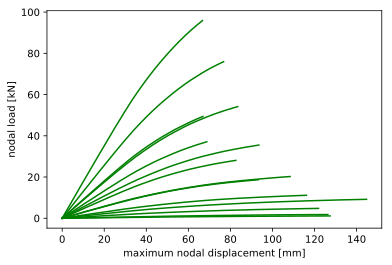

In [121]:
Span   = 20  # m span of two-member structure
Height = Span/LperH   # m height at apex
DStart=50
DStep=50
tStart=5
tStep=5
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))
Fz = -100.; #kN
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        DA[k]=D
        t=tStart+tStep*j
        tA[k]=t
        GRS = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS)
        GRS.SupType=2 #oldalnyomasmentes
        GRS.MatNL=MatNL
        tk.BuildOpsModel(GRS)
        GRS.Steps = 200
        GRS.MinStepSize = 0.01
        disp, force, ID, loadA, ok = tk.Analyze(GRS, -FFF[k]*1.1, 1, 0)
        if ok:
            CapacityF[k]=loadA[-1]  #kN
            Capacity[k]=loadA[-1]*GRS.nbnBns/GRS.span**2  #kN/m2
            rhoA[k]=tk.EqProperties(GRS)
            Dmax[k],Nmin[k],Nmax[k],Mmax[k],nminid, nmaxid, mid,_=tk.GetResults(disp, force);
            eqBA[k] = GRS.eqB
            eqTA[k] = GRS.eqT
            EA[k] = GRS.Eeq
            TA[k] = GRS.teq
            AA[k] = GRS.secA
            _ = plt.plot(disp[:,ID,2],loadA, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

In [135]:
FFF

array([  10.  ,   10.  ,   15.  ,   28.75,   23.  ,   64.5 ,   37.  ,
        109.25,   58.  ,  168.  ,   80.  ,  231.  ,  100.  ,  292.  ])

D:  [100 200 300 400 500 600 700]
t:  [ 5 15]


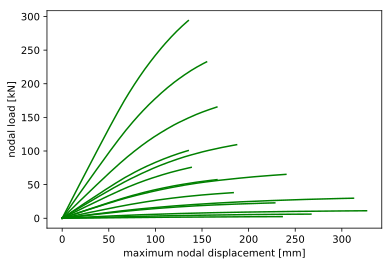

In [136]:
Span   = 40  # m span of two-member structure
Height = Span/LperH   # m height at apex
DStart=100
DStep=100
tStart=5
tStep=10
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))
Fz = -400.; #kN
#GRS2.Steps = 50
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS2 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS2)
        GRS2.SupType=2 #oldalnyomasmentes
        GRS2.MatNL=MatNL
        tk.BuildOpsModel(GRS2)
        GRS2.Steps = 200
        GRS2.MinStepSize = 0.01
        disp2, force2, ID2, loadA2, ok=tk.Analyze(GRS2, -FFF[k]*1.1, 1, 0)
        if ok:
            rhoA2[k]=tk.EqProperties(GRS2)
            CapacityF2[k]=loadA2[-1]  #kN
            Capacity2[k]=loadA2[-1]*GRS2.nbnBns/GRS2.span**2  #kN/m2
            Dmax2[k],Nmin2[k],Nmax2[k],Mmax2[k],nminid, nmaxid, mid,_=tk.GetResults(disp2, force2);
            _ = plt.plot(disp2[:,ID2,2],loadA2, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

In [156]:
FFF

array([  15.        ,   16.62375   ,   35.        ,   48.324375  ,
         64.68      ,  119.41875   ,  100.53183594,  189.75      ,
        143.55      ,  273.24      ,  195.195     ,  372.405     ,
        253.8525    ,  485.76      ])

D:  [150 250 350 450 550 650 750]
t:  [15 30]
load was lower than capacity


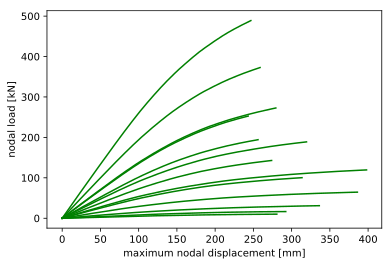

In [160]:
Span   = 60  # m span of two-member structure
Height = Span/LperH   # m height at apex
DStart=150
DStep=100
tStart=15
tStep=15
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))
Fz = -500.; #kN
#GRS3.Steps = 100
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS3 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS3)
        GRS3.SupType=2 #oldalnyomasmentes
        GRS3.MatNL=MatNL
        tk.BuildOpsModel(GRS3)
        GRS3.Steps = 200
        GRS3.MinStepSize = 0.01
        disp3, force3, ID3, loadA3, ok=tk.Analyze(GRS3, -FFF[k]*1.1, 1, 0)
        if ok:
            rhoA3[k]=tk.EqProperties(GRS3)
            CapacityF3[k]=loadA3[-1]  #kN
            Capacity3[k]=loadA3[-1]*GRS3.nbnBns/GRS3.span**2  #kN/m2
            Dmax3[k],Nmin3[k],Nmax3[k],Mmax3[k],nminid, nmaxid, mid,_=tk.GetResults(disp3, force3);
            _ = plt.plot(disp3[:,ID2,2],loadA3, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

# Results

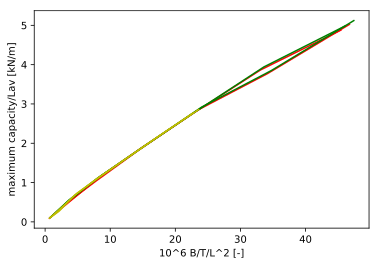

In [17]:
plt.plot(rhoA[::2]*1e6,CapacityF[::2]/GRS.Lav/5,'r', ms=5) # L=20
plt.plot(rhoA[1::2]*1e6,CapacityF[1::2]/GRS.Lav/10,'r', ms=5) # L=20
plt.plot(rhoA2[::2]*1e6,CapacityF2[::2]/GRS2.Lav/5,'g', ms=5) # L=40
plt.plot(rhoA2[1::2]*1e6,CapacityF2[1::2]/GRS2.Lav/15,'g', ms=5) # L=40
plt.plot(rhoA3[::2]*1e6,CapacityF3[::2]/GRS3.Lav/15,'y', ms=5) # L=60
plt.plot(rhoA3[1::2]*1e6,CapacityF3[1::2]/GRS3.Lav/30,'y', ms=5) # L=60
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity/Lav [kN/m]')
plt.show()

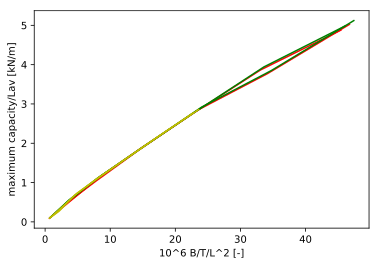

In [18]:
plt.plot(rhoA[::2]*1e6,Capacity[::2]/GRS.Lav/5/GRS.nbnBns*GRS.span**2,'r', ms=5) # L=20
plt.plot(rhoA[1::2]*1e6,Capacity[1::2]/GRS.Lav/10/GRS.nbnBns*GRS.span**2,'r', ms=5) # L=20
plt.plot(rhoA2[::2]*1e6,Capacity2[::2]/GRS2.Lav/5/GRS2.nbnBns*GRS2.span**2,'g', ms=5) # L=40
plt.plot(rhoA2[1::2]*1e6,Capacity2[1::2]/GRS2.Lav/15/GRS2.nbnBns*GRS2.span**2,'g', ms=5) # L=40
plt.plot(rhoA3[::2]*1e6,Capacity3[::2]/GRS3.Lav/15/GRS3.nbnBns*GRS3.span**2,'y', ms=5) # L=60
plt.plot(rhoA3[1::2]*1e6,Capacity3[1::2]/GRS3.Lav/30/GRS3.nbnBns*GRS3.span**2,'y', ms=5) # L=60
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity/Lav [kN/m]')
plt.show()

# Save results

In [164]:
r1OM=rhoA[::2]
f1OM=CapacityF[::2]/GRS.Lav/5
r2OM=rhoA[1::2]
f2OM=CapacityF[1::2]/GRS.Lav/10
r3OM=rhoA2[::2]
f3OM=CapacityF2[::2]/GRS2.Lav/5
r4OM=rhoA2[1::2]
f4OM=CapacityF2[1::2]/GRS2.Lav/15
r5OM=rhoA3[::2]
f5OM=CapacityF3[::2]/GRS3.Lav/15
r6OM=rhoA3[1::2]
f6OM=CapacityF3[1::2]/GRS3.Lav/30

In [168]:
A_df = pd.DataFrame(r1OM)
B_df = pd.DataFrame(f1OM)
C_df = pd.DataFrame(r2OM)
D_df = pd.DataFrame(f2OM)
E_df = pd.DataFrame(r3OM) 
F_df = pd.DataFrame(f3OM) 
G_df = pd.DataFrame(r4OM) 
H_df = pd.DataFrame(f4OM) 
I_df = pd.DataFrame(r5OM) 
J_df = pd.DataFrame(f5OM) 
K_df = pd.DataFrame(r6OM) 
L_df = pd.DataFrame(f6OM) 
df1 = pd.DataFrame(CapacityF)
df2 = pd.DataFrame(Capacity)
df3 = pd.DataFrame(Mmax)
df4 = pd.DataFrame(Nmin)
df5 = pd.DataFrame(Nmax)
df6 = pd.DataFrame(Dmax)
df7 = pd.DataFrame(rhoA)
df8 = pd.DataFrame(eqBA)
df9 = pd.DataFrame(eqTA)
df10 = pd.DataFrame(EA)
df11 = pd.DataFrame(TA)
df12 = pd.DataFrame(DA)
df13 = pd.DataFrame(tA)
df14 = pd.DataFrame(AA)
df15 = pd.DataFrame(rhoA2)
df16 = pd.DataFrame(CapacityF2)
df17 = pd.DataFrame(Capacity2)
df18 = pd.DataFrame(Mmax2)
df19 = pd.DataFrame(Nmin2)
df20 = pd.DataFrame(Nmax2)
df21 = pd.DataFrame(Dmax2)
df22 = pd.DataFrame(rhoA3)
df23 = pd.DataFrame(CapacityF3)
df24 = pd.DataFrame(Capacity3)
df25 = pd.DataFrame(Mmax3)
df26 = pd.DataFrame(Nmin3)
df27 = pd.DataFrame(Nmax3)
df28 = pd.DataFrame(Dmax3)

with pd.HDFStore(mainpath+'/Saved results/Tekno/OM_L.h5') as store:
    store['r1OM'] = A_df
    store['f1OM'] = B_df
    store['r2OM'] = C_df
    store['f2OM'] = D_df
    store['r3OM'] = E_df
    store['f3OM'] = F_df
    store['r4OM'] = G_df
    store['f4OM'] = H_df
    store['r5OM'] = I_df
    store['f5OM'] = J_df
    store['r6OM'] = K_df
    store['f6OM'] = L_df
    store['CapacityF']=df1
    store['Capacity']=df2
    store['Mmax']=df3
    store['Nmin']=df4
    store['Nmax']=df5
    store['Dmax']=df6
    store['rhoA']=df7
    store['eqBA']=df8
    store['eqTA']=df9
    store['EA']=df10
    store['TA']=df11
    store['DA']=df12
    store['tA']=df13
    store['AA']=df14
    store['rhoA2']=df15
    store['CapacityF2']=df16
    store['Capacity2']=df17
    store['Mmax2']=df18
    store['Nmin2']=df19
    store['Nmax2']=df20
    store['Dmax2']=df21
    store['rhoA3']=df22
    store['CapacityF3']=df23
    store['Capacity3']=df24
    store['Mmax3']=df25
    store['Nmin3']=df26
    store['Nmax3']=df27
    store['Dmax3']=df28